# E7. 네이버 영화리뷰 감성분석 프로젝트

## 프로젝트 개요

- 참고: [동아비즈니스리뷰 감성분석 활용사례 기고](https://dbr.donga.com/article/view/1202/article_no/8891/ac/magazine)
- 최근 '글에 내재헤 있는 사람들의 주과적 태도와 감성을 추출해 내는 분석 기법'인 '감성 분석'에 대한 관심이 높아지고 있음
- 감성 분석은 소셜미디어와 같은 웹사이트/매체에서 정보를 수집하는 '데이터 수집' 단계, 수집된 정보에서 텍스트 작성자의 주관이 드러난 부분만을 걸러내는 '주관성 탐지' 과정, 마지막으로 '주관성의 극성'이나 '정도'를 측정하고 분류하는 과정으로 나뉠 수 있음
- 대표적 성공 사례로 초코바 스니커즈의 소비자 감성 변화에 따른 가격변동 마케팅, 국내 유명 화장품 브랜드 에뛰드하우스의 감성 분석 꼽을 수 있음
- 감성 분석에 성공하기 위해서는 적용 분야별 특성을 살린 사전을 구축하고, 데이터 수집 전략을 세우며, 다른 데이터와 연계해 다양한 분석을 수행할 수 있어야 함

### 감성 분석과 딥러닝(Deep Learning)
- 워드 임베딩 기술은 단어들의 의미가 유사할 경우 벡터 공간상(Embedding Space)에 가깝게 배치해 단어들 간의 어휘적 관계를 벡터로 표현하는 효과적인 단어 표현 방법
- 대표적인 워드 임베딩 방법으로는 구글 연구진이 개발한 Word2vec 등을 들 수 있음
- 감성 분석에 워드 임베딩과 결합한 딥러닝(Deep Learning) 기법이 우수한 성과를 보인다는 연구 결과들이 축적되면서 최근에는 다양한 모델이 제시되고 있음
- 특히, 딥 뉴럴 네트워크(Deep Neural Networks)를 기반으로 감성 분석을 수행할 경우, 기존의 전통적인 기계 학습의 분류기에 입력으로 사용되는 특성들의 차원 수가 많아졌을 때 성능이 저하되는 것을 보완할 수 있을 뿐 아니라 변수 추출 과정 없이 텍스트에서 자동으로 특성을 추출하기 때문에 감성 분석과 관련한 분야에서 활발히 연구되고 있음
- 감성 분석에 대표적으로 많이 활용되는 딥러닝 모델에는 CNN(Convolutional Neural Network)과 LSTM(Long Short-Term Memory Network) 등이 있음

## 프로젝트 소개

- 한국어 텍스트의 감정분석 진행
- 활용할 데이터셋은 네이버 영화의 댓글을 모아 구성된 [Naver sentiment movie corpus](https://github.com/e9t/nsmc)
- 데이터 다운로드 없이 'Cloud shell'에서 해당 파일의 심볼릭 링크를 연결
```python
$ ln -s ~/data/*.txt ~/aiffel/sentiment_classification/data
```

## 데이터셋 소개

- [Naver Movies](https://movie.naver.com/movie/point/af/list.naver)에서 스크랩된 한국어로 작성된 영화 리뷰 데이터셋
- 데이터 세트 구성은 Maas et.al., 2011의 [Large movie review dataset](http://ai.stanford.edu/~amaas/data/sentiment/)에 언급된 방법에 기초하고 있음

### 데이터셋 구성
- 각 파일은 3개의 컬럼(id, document, label)으로 구성되어 있음
    - id: 리뷰를 작성한 id(네이버에 의해 제공됨)
    - document: 작성된 영화 리뷰
    - label: 리뷰가 속한 sentiment 클래스(0: 부정, 1: 긍정)
    - 컬럼은 'tab'으로 구분되어 있음(tsv 파일 형식. 그러나, 파일 확장명은 .txt이므로 초보자들도 쉽게 다룰 수 있음)
- 총 20만건의 영화 리뷰
    - ratings.txt: 전체 20만 개의 리뷰
    - ratings_test.txt: test에 사용할 50,000개의 리뷰
    - ratings_train.txt: train에 사용할 15만 개의 리뷰
    


### 데이터셋 특징
- 모든 리뷰가 140자 미만으로 작성되어 있음
- 각 sentimenet class가 동일하게 표본 추출됨(즉, 랜덤 추출은 50% 정확도를 산출함)
- 10만 개의 부정적 입장의 리뷰(1점-4점에 해당하는 리뷰)
- 10만 개의 긍정적 입장의 리뷰(9점-10점에 해당하는 리뷰)
- 중립적 입장의 리뷰(5점-8점에 해당하는 리뷰)는 제외됨



### 예시
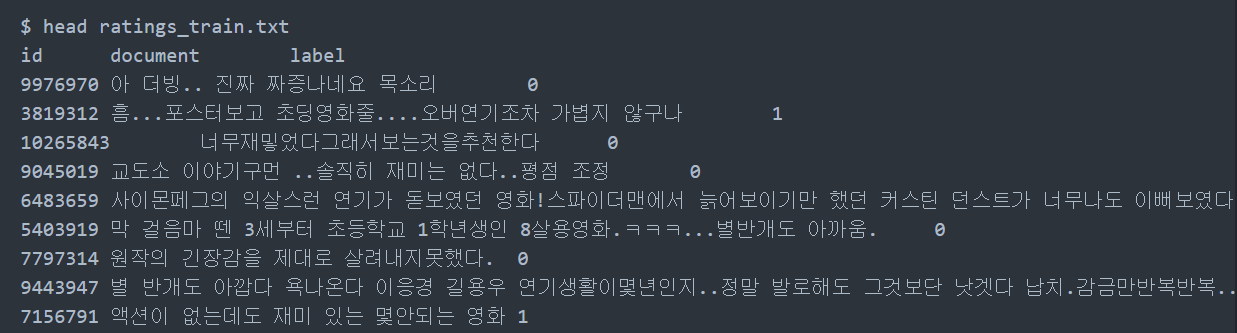


## 1. 데이터 준비와 확인

In [25]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


## 2. 데이터로더 구성

- 실습 때 다루었던 IMDB 데이터셋은 텍스트를 가공하여 'imdb.data_loader()' 메소드를 호출하면 숫자 인덱스로 변환된 텍스트와 'word_to_index' 딕셔너리까지 친절하게 제공
- 그러나, 이번에 다루게 될 nsmc 데이터셋은 전혀 가공되지 않은 텍스트 파일로 이루어져 있음
- 이것을 읽어서 'imdb.data_loader()와 동일하게 동작하는 자신만의 data_loader를 만들어 보는 것으로 시작
- 'data_loader' 안에서는 다음을 수행해야 함
    - 데이터의 중복 제거
    - NaN 결측치 제거
    - 한국어 토크나이저로 토큰화
    - 불용어(Stopwords) 제거
    - 사전 'word_to_index' 구성
    - 텍스트 스트링을 사전 인덱스 스트링으로 변환
    - 'X_train', 'y_train', 'X_test', 'y_test', 'word_to_index' 리턴

In [26]:
from konlpy.tag import Mecab
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 

    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)

    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}

    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]

    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))

    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)
index_to_word = {index:word for word, index in word_to_index.items()}

In [27]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [28]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수
# 단, 모든 문장은 <BOS>로 시작하는 것으로 함 - 'Beginning of Sentence'
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']] + [word_to_index[word] if word in word_to_index else word_to_index]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수
def get_decoded_sentence(encoded_sentence, index_to_word):
    # [1:]를 통해 <BOS>를 제외
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

## 3. 모델구성을 위한 데이터 분석 및 가공

### 데이터셋 내 문장 길이 분포

In [29]:
total_data_text = list(X_train) + list(X_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장길이의 평균값, 최대값, 표준편차 계산 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092


### 적절한 최대 문장 길이 지정

In [30]:
# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

pad_sequences maxlen :  41
전체 문장의 0.9342988343341575%가 maxlen 설정값 이내에 포함됩니다. 


### keras.preprocessing.sequences.pad_sequences을 활용한 패딩 추가 
- 유의해야 하는 것은 padding 방식을 문장 뒤쪽('post')과 앞쪽('pre') 중 어느 쪽으로 하느냐에 따라 RNN을 이용한 딥러닝 적용 시 성능 차이가 발생한다는 점
- 2가지 방식을 한번씩 다 적용해서 RNN을 학습시켜 보면서 그 결과를 비교해 보기

In [31]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

X_test = keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(X_train.shape)

(146182, 41)


## 4. 모델구성 및 validation set 구성

- 모델을 3가지 이상 다양하게 구성하여 실험

#### 첫번째 모델

In [32]:
# 어휘 사전의 크기(10,000개의 단어)
vocab_size = 10000
# 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)
word_vector_dim = 16  

# model 설계
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.MaxPooling1D(5))
model.add(keras.layers.Conv1D(16, 7, activation='relu'))
model.add(keras.layers.GlobalMaxPooling1D())
model.add(keras.layers.Dense(8, activation='relu'))
# 최종 출력은 긍정/부정을 나타내는 1dim
model.add(keras.layers.Dense(1, activation='sigmoid'))  

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [33]:
# validation set 10000건 분리
X_val = X_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_X_train = X_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_X_train.shape)
print(partial_y_train.shape)

(136182, 41)
(136182,)


In [34]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/20
266/266 [==============================] - 3s 8ms/step - loss: 0.5868 - accuracy: 0.6602 - val_loss: 0.3508 - val_accuracy: 0.8467
Epoch 2/20
266/266 [==============================] - 2s 7ms/step - loss: 0.3232 - accuracy: 0.8628 - val_loss: 0.3360 - val_accuracy: 0.8529
Epoch 3/20
266/266 [==============================] - 2s 8ms/step - loss: 0.2856 - accuracy: 0.8817 - val_loss: 0.3343 - val_accuracy: 0.8520
Epoch 4/20
266/266 [==============================] - 2s 7ms/step - loss: 0.2577 - accuracy: 0.8958 - val_loss: 0.3433 - val_accuracy: 0.8525
Epoch 5/20
266/266 [==============================] - 2s 8ms/step - loss: 0.2282 - accuracy: 0.9121 - val_loss: 0.3628 - val_accuracy: 0.8516
Epoch 6/20
266/266 [==============================] - 2s 7ms/step - loss: 0.1933 - accuracy: 0.9281 - val_loss: 0.3982 - val_accuracy: 0.8438
Epoch 7/20
266/266 [==============================] - 2s 7ms/step - loss: 0.1670 - accuracy: 0.9397 - val_loss: 0.4140 - val_accuracy: 0.8392
Epoch 

In [35]:
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 1.0018 - accuracy: 0.8159
[1.0018441677093506, 0.8158960342407227]


- model.fit() 과정 중의 train/validation loss, accuray 등이 매 epoch마다 history 변수에 저장되어 있음
- 이 데이터를 그래프로 그려 보면, 수행했던 딥러닝 학습이 잘 진행되었는지, 오버피팅 혹은 언더피팅하지 않았는지, 성능을 개선할 수 있는 다양한 아이디어를 얻을 수 있는 좋은 자료가 됨

In [36]:
# epoch에 따른 그래프를 그려볼 수 있는 항목들
history_dict = history.history
print(history_dict.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


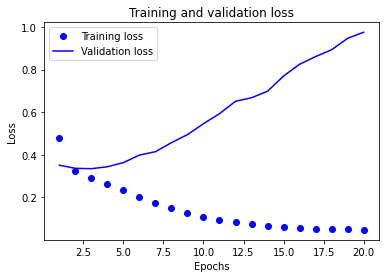

In [37]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

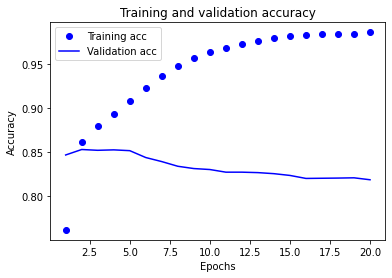

In [38]:
# 그림을 초기화
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 두번째 모델

In [39]:
# RNN 모델을 사용하여 이전 스텝의 텍스트 데이터를 처리하는 예제코드 구현

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape = (None,)))
# 가장 널리 쓰이는 RNN인 LSTM 레이어 사용
# 이때 LSTM state 벡터의 차원수는 8로 함(변경 가능)
model2.add(keras.layers.LSTM(8))
model2.add(keras.layers.Dense(8, activation = 'relu'))
# 최종 출력은 긍정/부정을 나타내는 1dim
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [40]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model2.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/20
266/266 [==============================] - 5s 12ms/step - loss: 0.6622 - accuracy: 0.5527 - val_loss: 0.3831 - val_accuracy: 0.8382
Epoch 2/20
266/266 [==============================] - 3s 10ms/step - loss: 0.3544 - accuracy: 0.8521 - val_loss: 0.3495 - val_accuracy: 0.8461
Epoch 3/20
266/266 [==============================] - 3s 10ms/step - loss: 0.3161 - accuracy: 0.8676 - val_loss: 0.3445 - val_accuracy: 0.8486
Epoch 4/20
266/266 [==============================] - 3s 10ms/step - loss: 0.3053 - accuracy: 0.8727 - val_loss: 0.3432 - val_accuracy: 0.8472
Epoch 5/20
266/266 [==============================] - 3s 10ms/step - loss: 0.2969 - accuracy: 0.8769 - val_loss: 0.3434 - val_accuracy: 0.8493
Epoch 6/20
266/266 [==============================] - 3s 10ms/step - loss: 0.2908 - accuracy: 0.8795 - val_loss: 0.3488 - val_accuracy: 0.8481
Epoch 7/20
266/266 [==============================] - 3s 10ms/step - loss: 0.2837 - accuracy: 0.8833 - val_loss: 0.3515 - val_accuracy: 0.8470

In [41]:
# LSTM 레이어 사용
model_2 = keras.Sequential()
model_2.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_2.add(keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model_2.add(keras.layers.Dense(8, activation='relu'))
model_2.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [42]:
# 학습 데이터 중 20000개를 validation set으로 사용
X_val = X_train[:20000]   
y_val = y_train[:20000]

partial_X_train = X_train[20000:]  
partial_y_train = y_train[20000:]

print(partial_X_train.shape)
print(partial_y_train.shape)

(126182, 41)
(126182,)


In [43]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model_2.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/20
247/247 [==============================] - 5s 12ms/step - loss: 0.6504 - accuracy: 0.5710 - val_loss: 0.3883 - val_accuracy: 0.8393
Epoch 2/20
247/247 [==============================] - 3s 10ms/step - loss: 0.3647 - accuracy: 0.8509 - val_loss: 0.3508 - val_accuracy: 0.8482
Epoch 3/20
247/247 [==============================] - 3s 10ms/step - loss: 0.3222 - accuracy: 0.8685 - val_loss: 0.3458 - val_accuracy: 0.8499
Epoch 4/20
247/247 [==============================] - 3s 10ms/step - loss: 0.3046 - accuracy: 0.8762 - val_loss: 0.3488 - val_accuracy: 0.8499
Epoch 5/20
247/247 [==============================] - 3s 10ms/step - loss: 0.2979 - accuracy: 0.8780 - val_loss: 0.3524 - val_accuracy: 0.8512
Epoch 6/20
247/247 [==============================] - 3s 10ms/step - loss: 0.2914 - accuracy: 0.8798 - val_loss: 0.3604 - val_accuracy: 0.8468
Epoch 7/20
247/247 [==============================] - 3s 10ms/step - loss: 0.2819 - accuracy: 0.8837 - val_loss: 0.3543 - val_accuracy: 0.8492

In [44]:
results = model2.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 5s - loss: 0.4648 - accuracy: 0.8392
[0.4647877812385559, 0.8391886949539185]


In [45]:
# epoch에 따른 그래프를 그려볼 수 있는 항목들
history_dict = history.history
print(history_dict.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


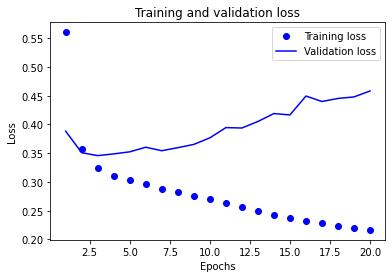

In [46]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

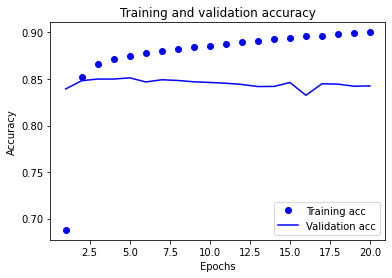

In [47]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 세번째 모델

In [48]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape = (None, )))
model3.add(keras.layers.GlobalMaxPooling1D())
model3.add(keras.layers.Dense(8, activation = 'relu'))
# 최종 출력은 긍정/부정을 나타내는 1dim
model3.add(keras.layers.Dense(1, activation = 'sigmoid'))

model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 160,145
Trainable params: 160,145
Non-trainable params: 0
_________________________________________________________________


In [57]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model3.fit(partial_X_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=8,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/20
15773/15773 [==============================] - 52s 3ms/step - loss: 0.2132 - accuracy: 0.9164 - val_loss: 0.3984 - val_accuracy: 0.8412
Epoch 2/20
15773/15773 [==============================] - 52s 3ms/step - loss: 0.2089 - accuracy: 0.9178 - val_loss: 0.3997 - val_accuracy: 0.8396
Epoch 3/20
15773/15773 [==============================] - 52s 3ms/step - loss: 0.2086 - accuracy: 0.9184 - val_loss: 0.4093 - val_accuracy: 0.8414
Epoch 4/20
15773/15773 [==============================] - 52s 3ms/step - loss: 0.2079 - accuracy: 0.9189 - val_loss: 0.4129 - val_accuracy: 0.8411
Epoch 5/20
15773/15773 [==============================] - 51s 3ms/step - loss: 0.2048 - accuracy: 0.9190 - val_loss: 0.4079 - val_accuracy: 0.8380
Epoch 6/20
15773/15773 [==============================] - 52s 3ms/step - loss: 0.2083 - accuracy: 0.9184 - val_loss: 0.4134 - val_accuracy: 0.8393
Epoch 7/20
15773/15773 [==============================] - 52s 3ms/step - loss: 0.2028 - accuracy: 0.9205 - val_loss: 0

In [58]:
results = model3.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.4509 - accuracy: 0.8319
[0.45093125104904175, 0.831946611404419]


In [59]:
# epoch에 따른 그래프를 그려볼 수 있는 항목들
history_dict = history.history
print(history_dict.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


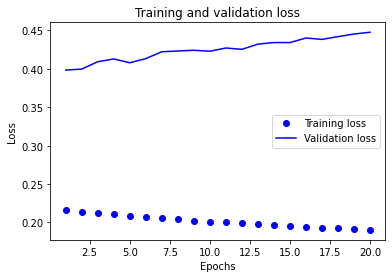

In [60]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

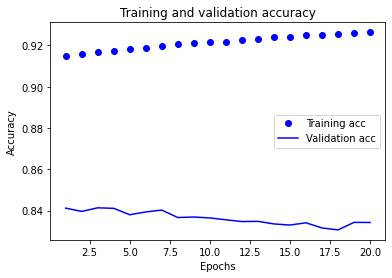

In [61]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 7. 학습된 Embedding 레이어 분석

In [62]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
# shape: (vocab_size, embedding_dim)
print(weights.shape)

(10000, 16)


In [63]:
import os

# 학습한 Embedding 파라미터를 파일에 써서 저장
word2vec_file_path = os.getenv('HOME') + '/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
# 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀 쓰기
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록
vectors = model.get_weights()[0]
for i in range(4, vocab_size):
    f.write('{} {} \n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

- 'genism'에서 제공하는 패키지를 이용해, 위에 남긴 임베딩 파라미터를 읽어서 word vector로 활용할 수 있음

In [65]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary = False)
vector = word_vectors['영하']
vector

array([ 0.07019742,  0.0815289 ,  0.05450437,  0.10097401,  0.0255363 ,
       -0.00996907, -0.06270871, -0.11435848, -0.14579116, -0.10393539,
        0.1275331 , -0.07560321, -0.06961599,  0.04738175, -0.03044937,
       -0.1489228 ], dtype=float32)

- 위와 같이 얻은 워드 벡터를 가지고 재미있는 실험 해볼 수 있음
- 워드 벡터가 의미벡터 공간상에 유의미하게 학습되었는지 확인하는 방법 중에, 단어를 하나 주고 그와 가장 유사한 단어와 가 그 유사도를 확인하는 방법
- 'genism'를 사용하면 아래와 같이 해볼수 있음

In [66]:
word_vectors.similar_by_word("영화")

[('소중', 0.871446967124939),
 ('특이', 0.8576990365982056),
 ('남', 0.8529782891273499),
 ('위하', 0.8325056433677673),
 ('져요', 0.829841673374176),
 ('연락', 0.8287829160690308),
 ('똑똑', 0.8050318956375122),
 ('소망', 0.7862129807472229),
 ('클린트', 0.782096803188324),
 ('잡아먹', 0.7818060517311096)]

- 영화라는 단어와 다른 단어를 그리 잘 찾았다고 느껴지지는 않음
- 감성분류 태스크를 잠깐 학습한 것만으로 워드 벡터가 유의미하게 학습되기는 어려운 것 같음
- 우리가 다룬 정도의 훈련데이터로는 워드 벡터를 정교하게 학습시키기 어려움
- 구글에서 제공하는 'word2Vec'라는 사전학습된(Pretrained) 워드 임베딩 모델을 가져다 활용
- Word2Vec은 무려 1억 개의 단어로 구성된 Google News datdaset을 바탕으로 학습되었음
- 총 300만 개의 단어를 각각 300차원의 벡터로 표현한 것
- Word2Vec이 학습되는 원리에 대해서는 차후 깊이있게 다루게 될 것
- 하지만 그렇게 해서 학습된 Word2Vec이라는 것도 방금 우리가 파일에 써본 Embedding Layer와 원리는 동일함
- 임베딩의 개념에 대해 아주 잘 정리된 책 '한국어 임베딩'의 서론에서 왜 사전학습된 임베딩을 활용하는 것이 유리한지 설명해 주고 있음
- 바로 전이학습 때문
- [한국어 임베딩 서문](https://ratsgo.github.io/natural%20language%20processing/2019/09/12/embedding/)

## 8. 한국어 Word2Vec 임베딩 활용하여 성능개선

- 한국어 Word2Vec은 다음 경로에서 구할 수 있음
- [Pre-trained word vectors of 30+ language](https://github.com/Kyubyong/wordvectors)

In [ ]:
import os
from gensim

word2vec_path = os.getenv('HOME') + '/aiffel/sentiment_classification/ko.bin'
word2vec = gensim.models.Word2Vec.load(word2vec_path, binary = True, limit = 1000000 )
vector = word2vec['computer']

# 무려 300dim의 워드 벡터
vector